<a href="https://colab.research.google.com/github/UERJ-FISICA/ML4PPGF_UERJ/blob/PPGF-2022-1/04_Classifica%C3%A7%C3%A3o_D%C3%ADgitos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams.update(
    {'font.size': 18,
     'font.family': 'sans-serif',
     'legend.fontsize': 16,
     'axes.labelsize': 22,
     'xtick.labelsize': 14,
     'ytick.labelsize': 14
    }
    )
import sklearn

### Amostra de dígitos escritos a mão e digitalizados

In [2]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
mnist.target = mnist.target.astype(np.int8)
sort_by_target(mnist)
X_train = mnist.data[:60000]
y_train = mnist.target[:60000]
X_test = mnist.data[60000:]
y_test = mnist.target[60000:]

In [3]:
print ( X_train.shape )
print ( X_test.shape )

(60000, 784)
(10000, 784)


3


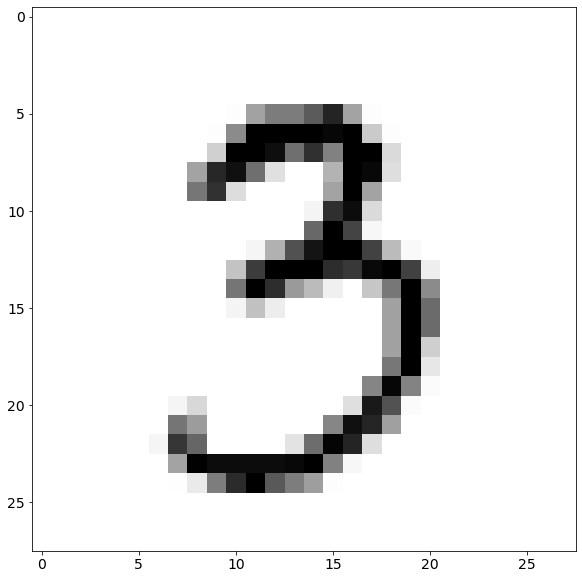

In [4]:
idx = 20000
print ( y_train[ idx ] )
fig = plt.figure( figsize=(10,10) )
plt.imshow( X_train[ idx ].reshape(28,28), cmap='binary' )

### Treinamento
### Classificador binário

$\textrm{Dígito} = 3 \rightarrow y = 1$

$\textrm{Dígito} \neq 3 \rightarrow y = 0$

In [5]:
msk_train_3 = ( y_train == 3 )
y_train_clf_3 = y_train.copy()
y_train_clf_3[ msk_train_3 ] = 1
y_train_clf_3[ ~msk_train_3 ] = 0
print ( y_train_clf_3[ msk_train_3 ] )
print ( y_train_clf_3[ ~msk_train_3 ] )

shuffle_index = np.random.permutation( 60000 )
X_train_shuffle, y_train_shuffle = X_train[ shuffle_index ], y_train_clf_3[ shuffle_index ]

[1 1 1 ... 1 1 1]
[0 0 0 ... 0 0 0]


In [6]:
from sklearn import linear_model
log_reg = linear_model.LogisticRegression( max_iter=1000000 )
log_reg.fit( X_train_shuffle[:5000], y_train_shuffle[:5000] )

LogisticRegression(max_iter=1000000)

[1.65467834e-38 1.00000000e+00]
Label: 0
Pred.: 1.654678340176924e-38
Label: 1
Pred.: 1.0


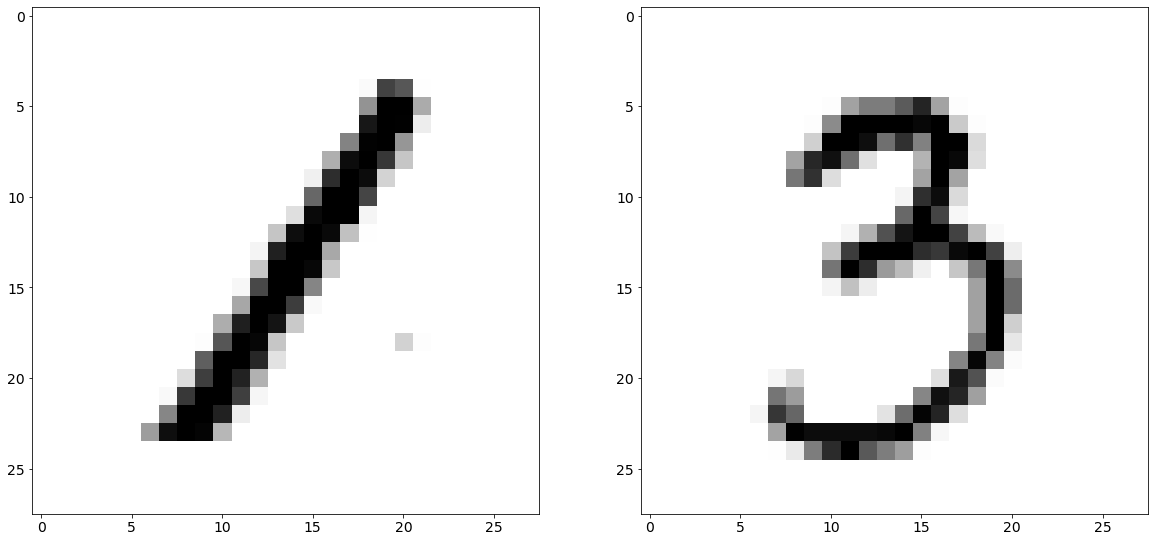

In [7]:
idx_list = [ 10000, 20000 ]

fig, axes = plt.subplots( 1, 2, figsize=(20,10) )

y_predict_proba = log_reg.predict_proba( X_train[ idx_list ] )[ :, 1 ]
print ( y_predict_proba )

for idx_, idx_data_ in enumerate( idx_list ):
    print ( "Label: {}".format( y_train_clf_3[ idx_data_ ] ) )
    print ( "Pred.: {}".format( y_predict_proba[ idx_ ] ) )
    axes[ idx_ ].imshow( X_train[ idx_data_ ].reshape(28,28), cmap='binary' )

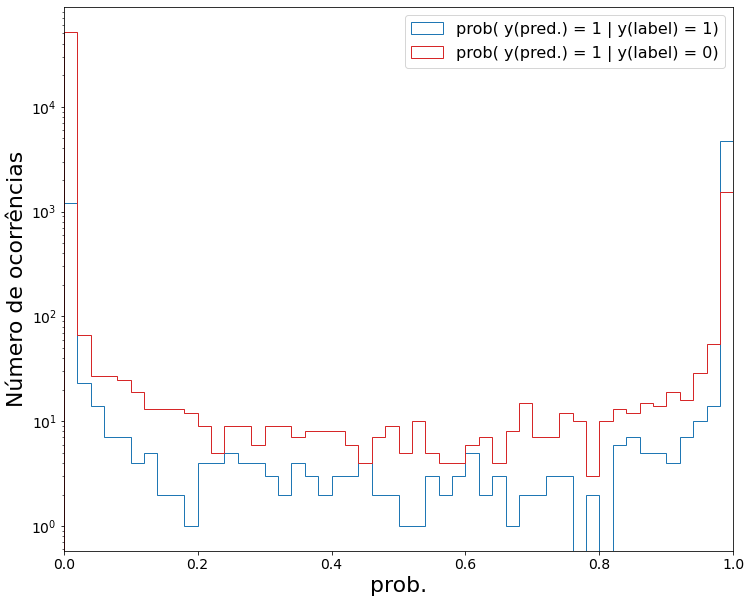

In [13]:
y_predict_proba_train = log_reg.predict_proba( X_train )[ :, 1 ]

fig = plt.figure( figsize=(12,10) )

plt.hist( y_predict_proba_train[ msk_train_3 ], histtype='step', color="tab:blue" , label="prob( y(pred.) = 1 | y(label) = 1)", bins=50, range=(0.,1.) )
plt.hist( y_predict_proba_train[ ~msk_train_3 ], histtype='step', color="tab:red" , label="prob( y(pred.) = 1 | y(label) = 0)", bins=50, range=(0.,1.) )
plt.legend( loc='best' )
plt.xlim( 0., 1. )
plt.xlabel( "prob." )
plt.ylabel( "Número de ocorrências" )
plt.yscale( 'log' )

### Teste

In [9]:
msk_test_3 = ( y_test == 3 )
y_test_clf_3 = y_test.copy()
y_test_clf_3[ msk_test_3 ] = 1
y_test_clf_3[ ~msk_test_3 ] = 0
print ( y_test_clf_3[ msk_test_3 ] )
print ( y_test_clf_3[ ~msk_test_3 ] )

[1 1 1 ... 1 1 1]
[0 0 0 ... 0 0 0]


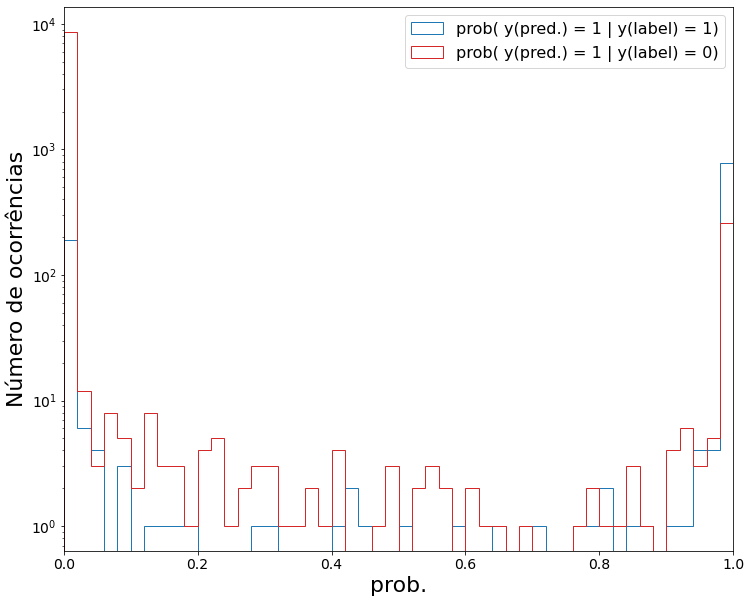

In [14]:
y_predict_proba_test = log_reg.predict_proba( X_test )[ :, 1 ]

fig = plt.figure( figsize=(12,10) )

plt.hist( y_predict_proba_test[ msk_test_3 ], histtype='step', color="tab:blue" , label="prob( y(pred.) = 1 | y(label) = 1)", bins=50, range=(0.,1.) )
plt.hist( y_predict_proba_test[ ~msk_test_3 ], histtype='step', color="tab:red" , label="prob( y(pred.) = 1 | y(label) = 0)", bins=50, range=(0.,1.) )
plt.legend( loc='best' )
plt.xlim( 0., 1. )
plt.xlabel( "prob." )
plt.ylabel( "Número de ocorrências" )
plt.yscale( 'log' )

In [11]:
prob_cut = 0.50

y_predict_test = np.full_like( y_predict_proba_test, -1 )
msk_prob_cut = ( y_predict_proba_test >= prob_cut )
y_predict_test[ msk_prob_cut ]  = 1
y_predict_test[ ~msk_prob_cut ] = 0

accuracy = np.sum( y_predict_test == y_test_clf_3 ) / y_test_clf_3.size
print ( "Accuracy = {}".format( accuracy ) )

Accuracy = 0.949


In [12]:
np.info( linear_model.LogisticRegression )

 LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0,
                    fit_intercept=True, intercept_scaling=1,
                    class_weight=None, random_state=None, solver='lbfgs',
                    max_iter=100, multi_class='auto', verbose=0,
                    warm_start=False, n_jobs=None, l1_ratio=None)

Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit
floats 